Import Packages

In [1]:
import numpy as np
import torch
from torch.autograd import grad
import torch.nn as nn
import matplotlib.pyplot as plt

import shutil
import argparse

#from models.mlp_direct import *
#from utils.pde_loss_functions import *
#from utils.cavity_dataset import *

In [2]:
model_checkpoint = r"Z:\PRJ-MLFluids\model_weights.pt"
losses_path = r"Z:\PRJ-MLFluids\training_losses.npy"
from basic_trainer import PINN_cavity, eval_model

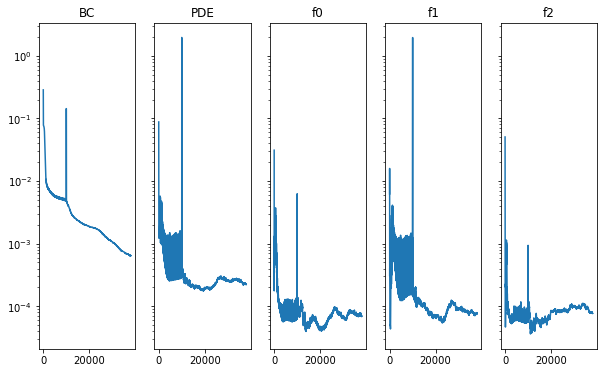

In [3]:
losses = np.load(losses_path, allow_pickle=True).item()

def plotLoss(losses_dict, path, info=["BC", "PDE", "f0", "f1", "f2"]):
    fig, axes = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(10, 6))
    axes[0].set_yscale("log")
    for i, j in zip(range(5), info):
        axes[i].plot(losses_dict[j.lower()])
        axes[i].set_title(j)
    plt.show()

plotLoss(losses, "./Navier-Stokes/loss_curve.png")

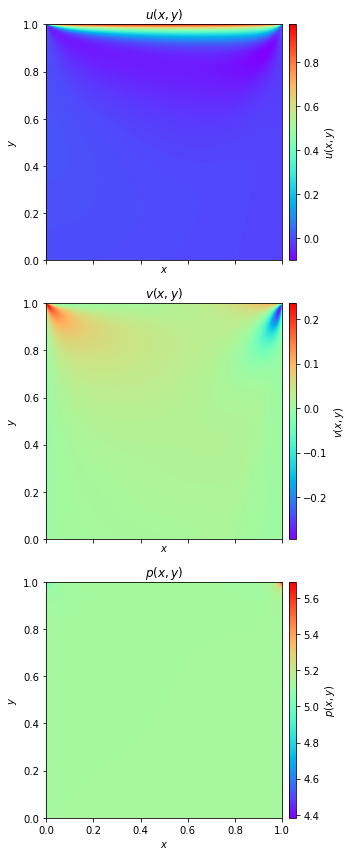

In [5]:
data = eval_model(model_checkpoint,show_fig=True)

In [ ]:
pinn = PINN_cavity(ub=1.0,lb=0.0)
pinn.net.load_state_dict(torch.load(model_checkpoint,map_location=torch.device('cpu')))

<All keys matched successfully>

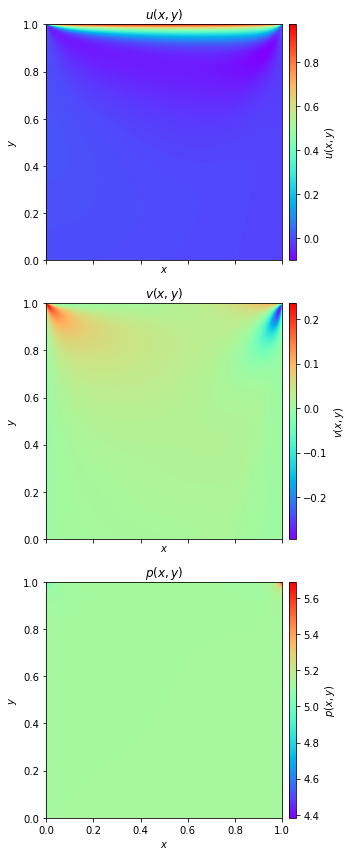

In [ ]:
x_min = 0.0
x_max = 1.0
y_min = 0.0
y_max = 1.0

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
x = np.arange(x_min, x_max, 0.001)
y = np.arange(y_min, y_max, 0.001)
X, Y = np.meshgrid(x, y)
x = X.reshape(-1, 1)
y = Y.reshape(-1, 1)

#dst_from_cyl = np.sqrt((x - xc) ** 2 + (y - yc) ** 2)
#cyl_mask = dst_from_cyl > r

xy = np.concatenate([x, y], axis=1)
xy = torch.tensor(xy, dtype=torch.float32)#.to(device)

with torch.no_grad():
    u, v, p = pinn.predict(xy)
    u = u.cpu().numpy().reshape(Y.shape)
    #u = np.where(cyl_mask, u, np.nan).reshape(Y.shape)
    v = v.cpu().numpy().reshape(Y.shape)
    #v = np.where(cyl_mask, v, np.nan).reshape(Y.shape)
    p = p.cpu().numpy().reshape(Y.shape)
    #p = np.where(cyl_mask, p, np.nan).reshape(Y.shape)

fig, axes = plt.subplots(3, 1, figsize=(11, 12), sharex=True)

data = (u, v, p)
labels = ["$u(x,y)$", "$v(x,y)$", "$p(x,y)$"]
for i in range(3):
    ax = axes[i]
    im = ax.imshow(
        data[i], cmap="rainbow", extent=[x_min, x_max, y_min, y_max], origin="lower"
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad="3%")
    fig.colorbar(im, cax=cax, label=labels[i])
    ax.set_title(labels[i])
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_aspect("equal")
fig.tight_layout()